In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv("energy_efficiency_data.csv")
df.describe().iloc[:3]

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306


In [5]:
df.isna().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

<AxesSubplot:title={'center':'Correlation map for variables'}>

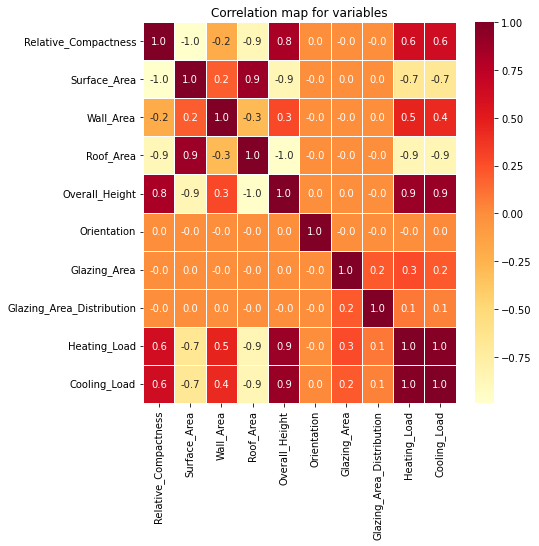

In [7]:
f,ax = plt.subplots(figsize=(7, 7))
ax.set_title('Correlation map for variables')
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap="YlOrRd")

In [15]:
print ("Unique values are:\n",df.nunique())
print(df.columns)

Unique values are:
 Relative_Compactness          12
Surface_Area                  12
Wall_Area                      7
Roof_Area                      4
Overall_Height                 2
Orientation                    4
Glazing_Area                   4
Glazing_Area_Distribution      6
Heating_Load                 586
Cooling_Load                 636
dtype: int64
Index(['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
       'Overall_Height', 'Orientation', 'Glazing_Area',
       'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load'],
      dtype='object')


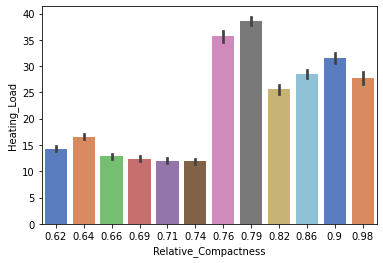

In [16]:
p = sns.barplot(data=df, x = df.columns[0] ,y=df.columns[8], palette='muted')

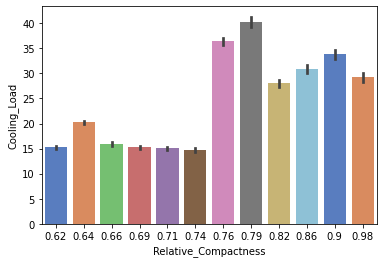

In [17]:
p = sns.barplot(data=df, x = df.columns[0] ,y=df.columns[9], palette='muted')

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been as

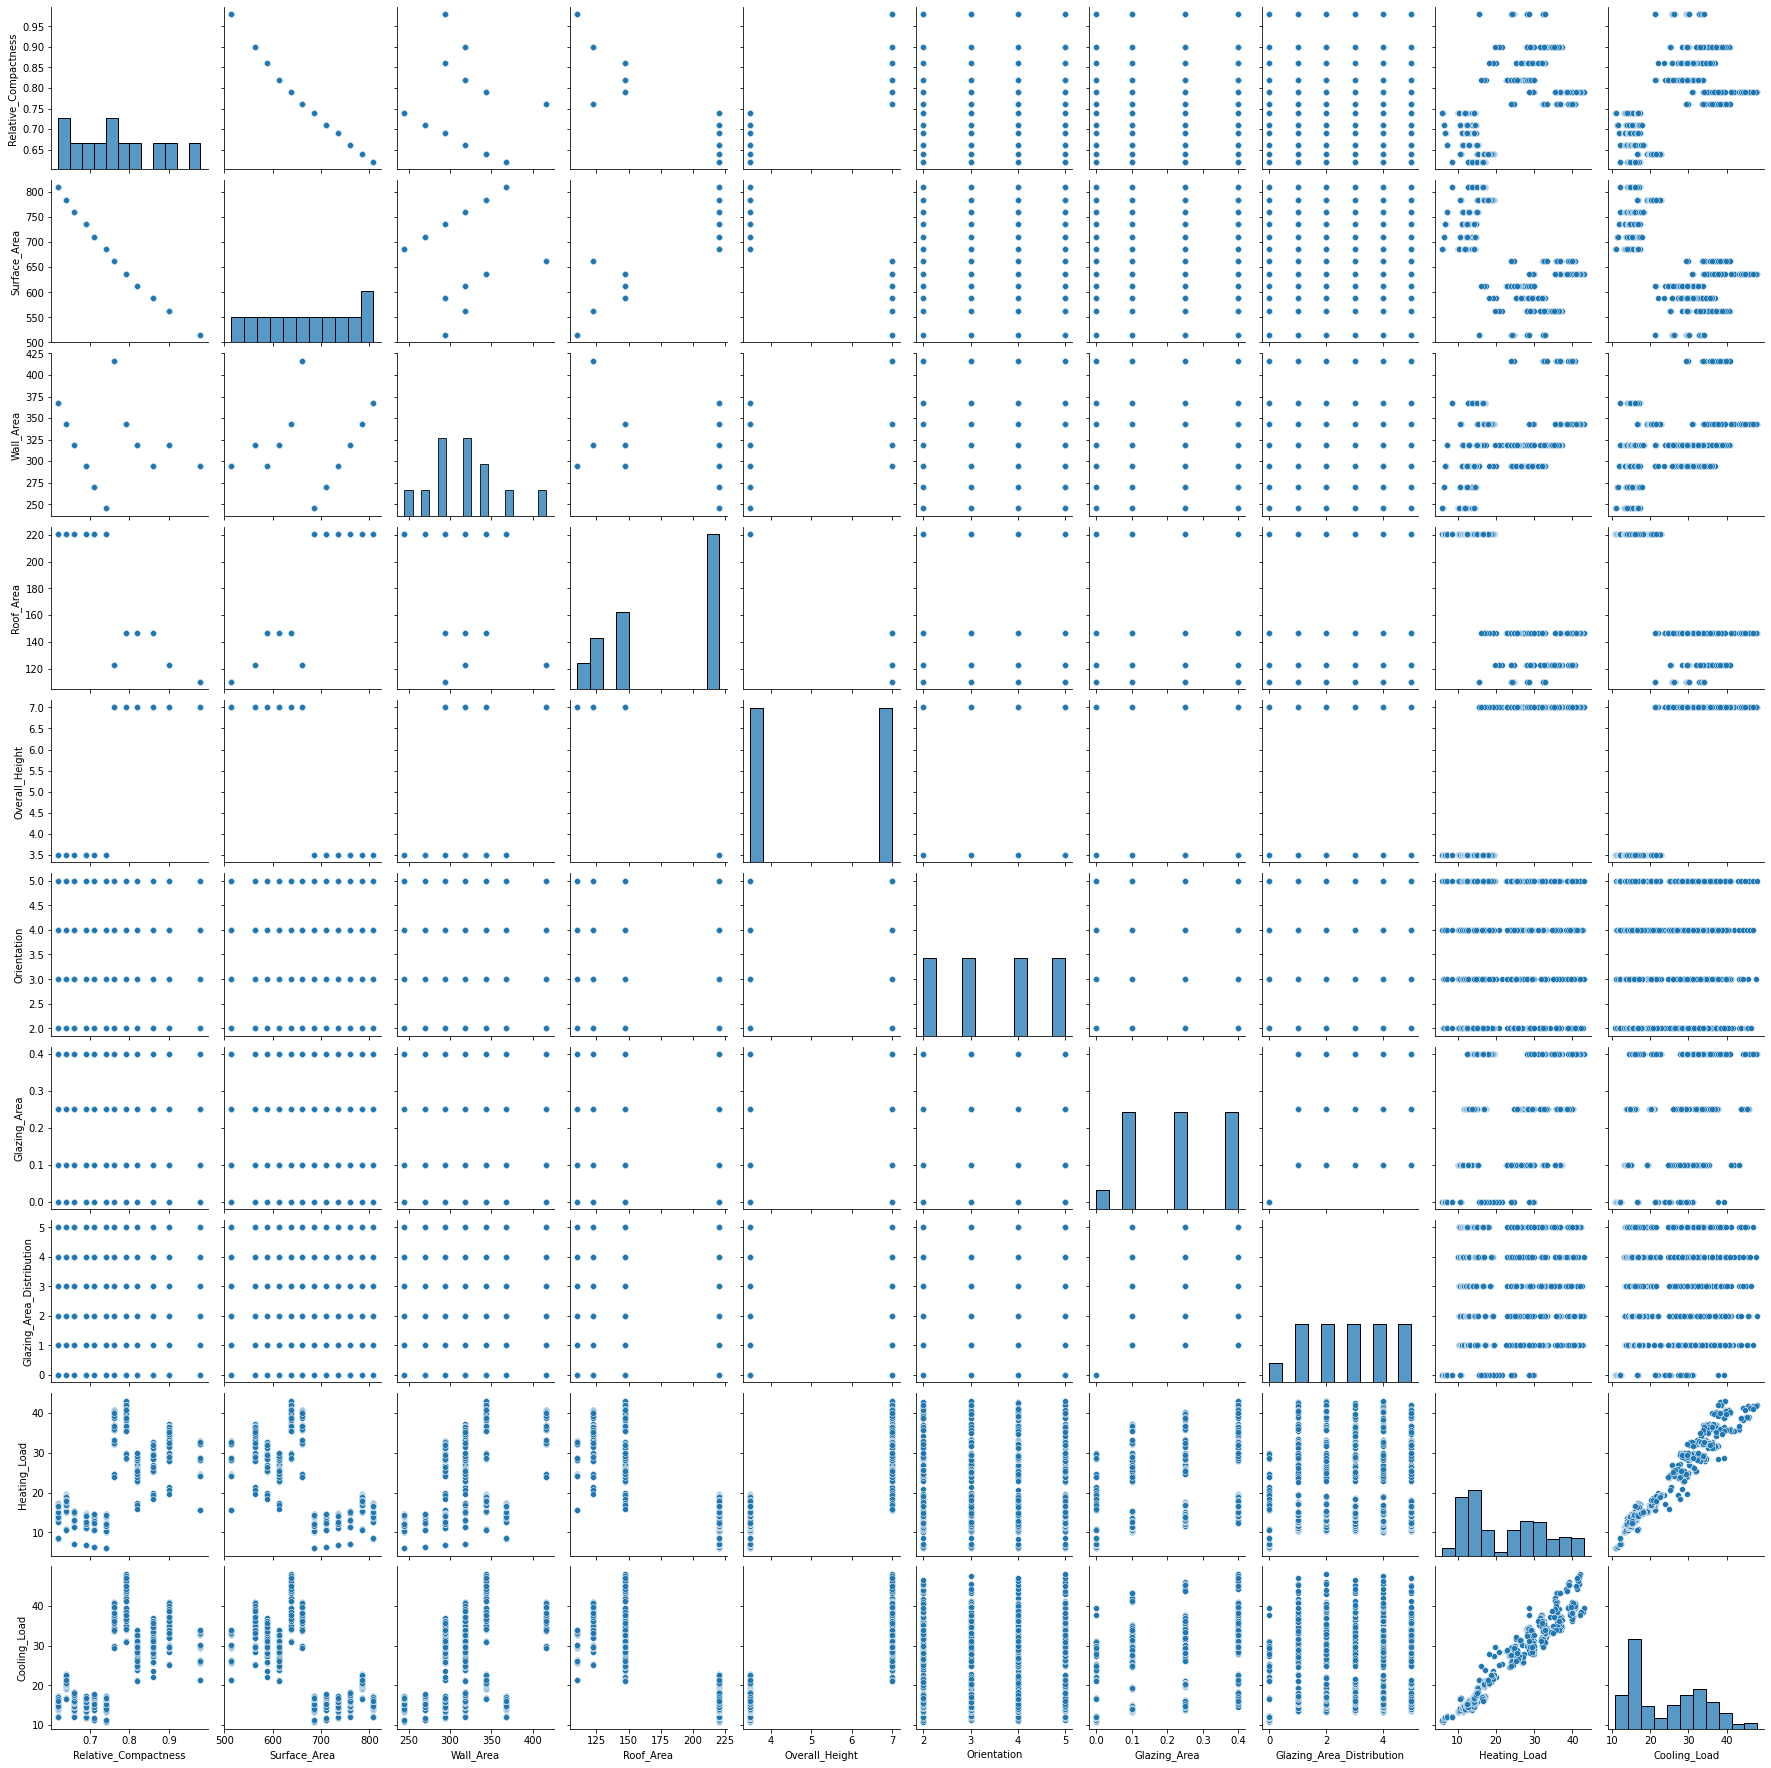

In [18]:
g = sns.pairplot(df,palette="husl")

In [24]:
df.columns

Index(['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
       'Overall_Height', 'Orientation', 'Glazing_Area',
       'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load'],
      dtype='object')

In [25]:
# Defining X and y
X = df.drop(['Heating_Load','Cooling_Load'], axis=1)
y = df['Heating_Load']

# Training the model
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42) # 80-20 split

# Checking split 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (614, 8)
y_train: (614,)
X_test: (154, 8)
y_test: (154,)


In [32]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=50, population_size=100, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_boston_pipeline.py')

                                                                                 
Generation 1 - Current best internal CV score: -0.17765723281303952
                                                                                 
Generation 2 - Current best internal CV score: -0.17765723281303952
                                                                                 
Generation 3 - Current best internal CV score: -0.17171303771797441
                                                                                 
Generation 4 - Current best internal CV score: -0.16889405996328258
                                                                                 
Generation 5 - Current best internal CV score: -0.16889405996328258
                                                                                 
Generation 6 - Current best internal CV score: -0.14278845325393957
                                                                                 
Generation 7 - Cur

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py:765: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but ElasticNetCV was fitted with feature names
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but ElasticNetCV was fitted with feature names
  warnings.warn(


In [30]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
xgbr = xgb.XGBRegressor(verbosity=0) 
print(xgbr)

xgbr.fit(X_train, y_train)
score = xgbr.score(X_train, y_train) 
print("Training score: ", score)
scores = cross_val_score(xgbr, X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())
score = xgbr.score(X_test, y_test) 
print("Test score: ", score)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
Training score:  0.9999805033737897
Mean cross-validation score: 1.00
Test score:  0.9986165608228406


In [31]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train, y_train)
lin_score = lin.score(X_test, y_test)
lin_score

0.9121832012699773

In [35]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr_score = rfr.score(X_test, y_test)
rfr_score

0.9977447934614424